# Exercise Sheet for Interpolation and Approximation
----------------------------------------------------------

In [1]:
#load some python packages you will need
import numpy as np                 #this helps compute things
import matplotlib.pyplot as plt    #this helps plot things

Matplotlib is building the font cache; this may take a moment.


### Enter your student ID number below, this will be used for a reproducable random number seed.

In [2]:
sid = 9903050  #  *** change this to your student number ***
seed = np.random.seed(sid)

----------------------------------------------------------

## Question 1
### a) Compute via interpolation and plot the Lagrange polynomial p(x) to $f(x) = cos(-2\pi x) + 0.4x^2$ over
### $(x_i,y_i) = [(7.2,21.04),(7.4,21.12),(7.6,22.39),(7.8,24.77]$ 


### b) Estimate the maximum absolute error bound for this Lagrange polynomial approximation over $\xi \in [x_0,x_n]$

In [3]:
x = np.arange(7,8,0.001)   #dummy range for function
y = np.cos(-2*np.pi*x) +0.4*x**2  #function f(x)


In [4]:
xi = np.array((7.2,7.4,7.6,7.8))   # points for interpolation
yi = y[np.digitize(xi,x)]


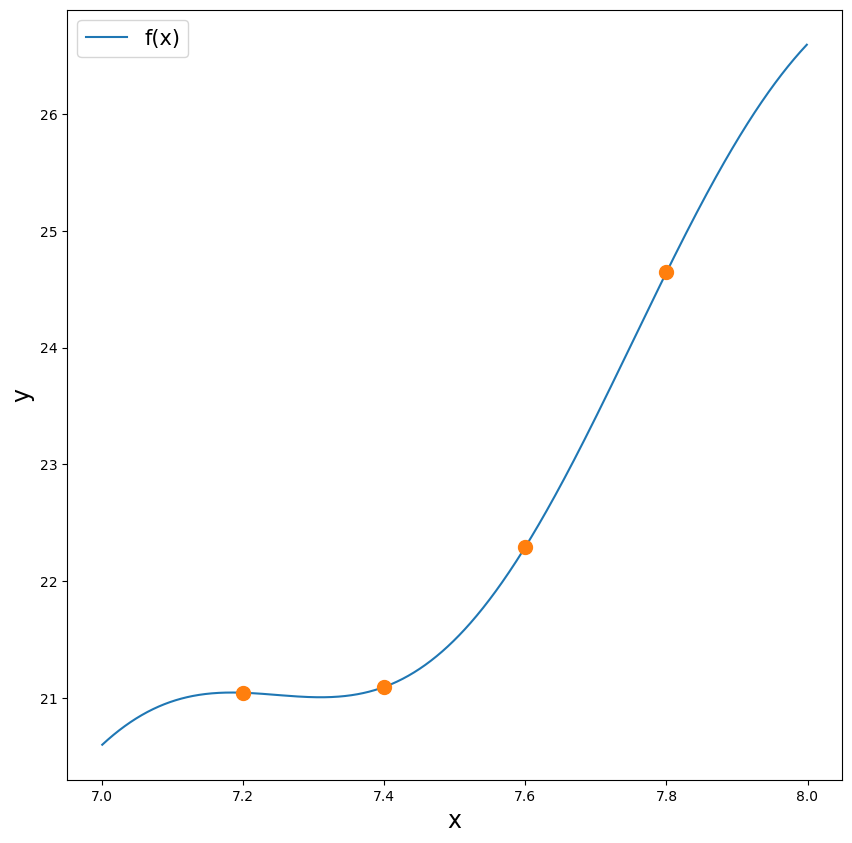

In [5]:
plt.figure(figsize=(10,10))
plt.plot(x,y,label='f(x)')  
plt.plot(xi,yi,'o',markersize=10)
plt.xlabel('x',fontsize=17)
plt.ylabel('y',fontsize=17)
plt.legend(loc='best',fontsize=15)


            3         2
-3.558e-11 x + 14.38 x - 209.6 x + 785.2


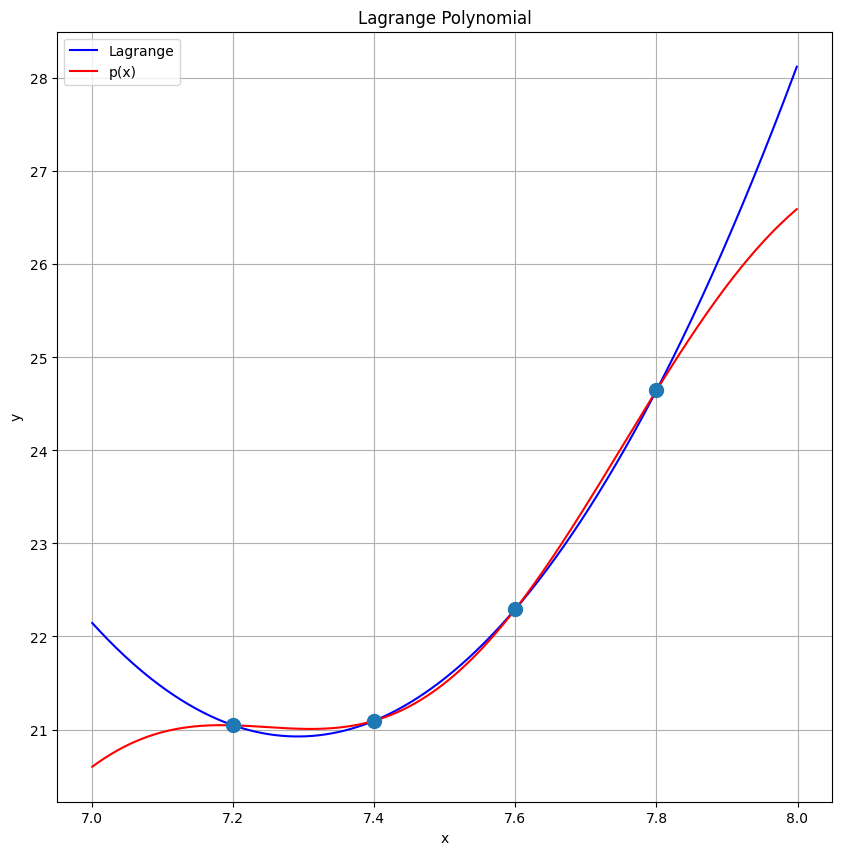

In [6]:
from scipy.interpolate import lagrange

# Given data points
xi = np.array([7.2, 7.4, 7.6, 7.8])
yi = y[np.digitize(xi,x)]

#Calculate Lagrange Polynomial
lpoly=lagrange(xi,yi)
print(lpoly)
#Coefficient for x³ is almost zero
#-->
#Result: 14.38x²-209.6x+785.2


#Plot the data points, the polynomial p(x) and the Lagrange polynomial
x = np.arange(7,8,0.001)   #dummy range for function
fig = plt.figure(figsize = (10,10))
plt.plot(x, lpoly(x), 'b', label="Lagrange")
plt.plot(x, y, 'r', label="p(x)")
plt.plot(xi,yi,'o',markersize=10)
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## Calculation of error

### 4 data points for evaluation of lagrange polynomial are given
### --> lagrange polynomial is of 3rd order
### --> need 4th derivative of p(x) to calculate error

$p(x)=cos(-2\pi x) + 0.4x^2$

$p'(x)=-2\pi sin(2 \pi x) + 0.8*x$

$p''(x)=-4 \pi^2 cos(2 \pi x)+ 0.8$

$p'''(x)=8 \pi^3 sin(2 \pi x)$

$p''''(x)=16 \pi^4 cos(2 \pi x)$

### According to the formula in the lecture notes this gives:

### $\left| E_3(x) \right|  \le  \frac{\max\limits_{x \in [7.2,\,7.8]} \left|16 \pi^4 cos (2\pi x) \right|}{4!}
  \;
  \max\limits_{x \in [7.2,\,7.8]}
  \left| (x - 7.2)(x - 7.4)(x - 7.6)(x - 7.8) \right|$

### We can ignore $cos(2 \pi x)$ because $\left| cos(2 \pi x) \right|$ is not higher than 1. Thus

### $ \left| E_3(x) \right|
  \le
  \frac{16\pi^4}{4!}
  \max_{x \in [7.2,\,7.8]}
  \left| (x - 7.2)(x - 7.4)(x - 7.6)(x - 7.8) \right|$

### We estimate the maximum of the product term numerically:


In [7]:
x = np.arange(7.2,7.8,0.00001)   

#initialize result with zeros
prod = np.zeros_like(x)

#calculate all products
for i in range(len(x)):
    prod[i]=abs((x[i]-7.2)*(x[i]-7.4)*(x[i]-7.6)*(x[i]-7.8))

#find maximum 
max_prod = np.max(prod)
x_at_max = x[np.argmax(prod)]

print("Maximum= ", max_prod)
print("reached at x =", x_at_max)






Maximum=  0.0015999999979491135
reached at x = 7.7236099999801775


### Thus $ \left| E_3(x) \right|
  \le
  \frac{16\pi^4}{4!}
  \max_{x \in [7.2,\,7.8]}
  \left| (x - 7.2)(x - 7.4)(x - 7.6)(x - 7.8) \right|$

###  $ \left| E_3(x) \right|
  \le
  \frac{16\pi^4}{4!} \cdot 0.0016$

###   $ \left| E_3(x) \right|  \le  0.104$

----------------------------------------------------------

## Question 2
### Assume linear interpolation with step size $\textbf{d}$ is used to approximate $y(x) = \pi x^7$
### What step size for linear interpolation do you need to have for an absolute error $E_{max} < 10^{-6}$?

----------------------------------------------------------

### According to the lecture notes: "Regardless of the form of f(x), the error will approximately scale of order $(x_{i+1} - x_{i})^2$ "

### From Wikipedia: error of linear interpolation is

### ${\displaystyle |R_{T}|\leq {\frac {(x_{1}-x_{0})^{2}}{8}}\max _{x_{0}\leq x\leq x_{1}}\left|y''(x)\right|}$

### Thus

$y'(x)=7\pi^6$

$y''(x)=42 \pi x^5$

### It follows:

### ${\displaystyle |R_{T}| \leq {\frac {(x_{1}-x_{0})^{2}}{8}}\max _{x_{0}\leq x\leq x_{1}}\left|42 \pi x^5\right|}$

### In the intervall [0,B] $\max _{x_{0}\leq x\leq x_{1}}\left|42 \pi x^5\right| = 42 \pi B^5$

### Thus for the step size $x_1-x_{0} = d$  it follows:

### $|R_{T}|\leq  \frac{d^2}{8} 42 \pi B^5$

### And

### $d \leq \sqrt{\frac{8 R_T}{42\pi B^5}}$

### With $R_T=E_{max}=10^{-6}$ this gives

## $d \leq \sqrt{\frac{4 \cdot 10^{-6}}{21\pi B^5}}$

## Error scales with d² (like stated in lecture notes) and with maximum of curvature (y''(x)). The curvature is proportional to the fifth power of x. Thus, the larger the interval (i.e. the larger B), the smaller the step size d has to be. For example for [0,1], step size d has to be approx. $2.46 \times 10^{-4}$. 


## Question 3
### When using Taylor polynomials to approximate $y = cos(-3 \pi x) + 3x$ over the range $x = [-0.25,0.25]$, about $x= 0$;  to what order $j$ would you need to compute the interpolating polynomial in order to keep the maximum absolute error smaller than $E_{j}(x) < 10^{-6}$?

Text(0, 0.5, 'y')

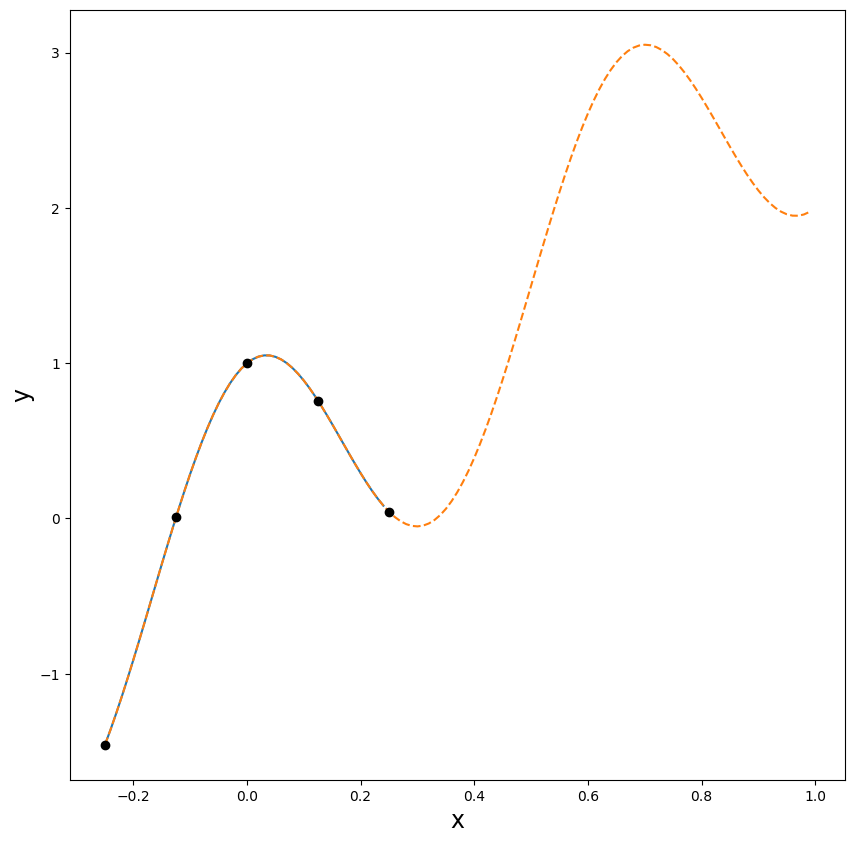

In [8]:
xi = np.arange(-0.25,1,0.01)
xdum = np.arange(-0.25,0.25,0.01)
x = np.array([-0.25,-0.125,0,0.125,0.25])
y = np.cos(-3*np.pi*x) + 3*x
ydum = np.cos(-3*np.pi*xdum) + 3*xdum
yi = np.cos(-3*np.pi*xi) + 3*xi
plt.figure(figsize=(10,10))
plt.plot(xdum,ydum)
plt.plot(xi,yi,'--')
plt.plot(x,y,'o',c='black')
plt.xlabel('x',fontsize=17)
plt.ylabel('y',fontsize=17)

----------------------------------------------------------

## Question 4
## Use bilinear interpolation to determine the value of the function $f(x,y) = z$  at the point $(x_r, y_r)$, given the below four data points $x_i, y_i$ with values $z_{i} = f(x_i,y_i)$


Text(0.04917144766637194, 0.48743621430512074, '($x_r,y_r)$')

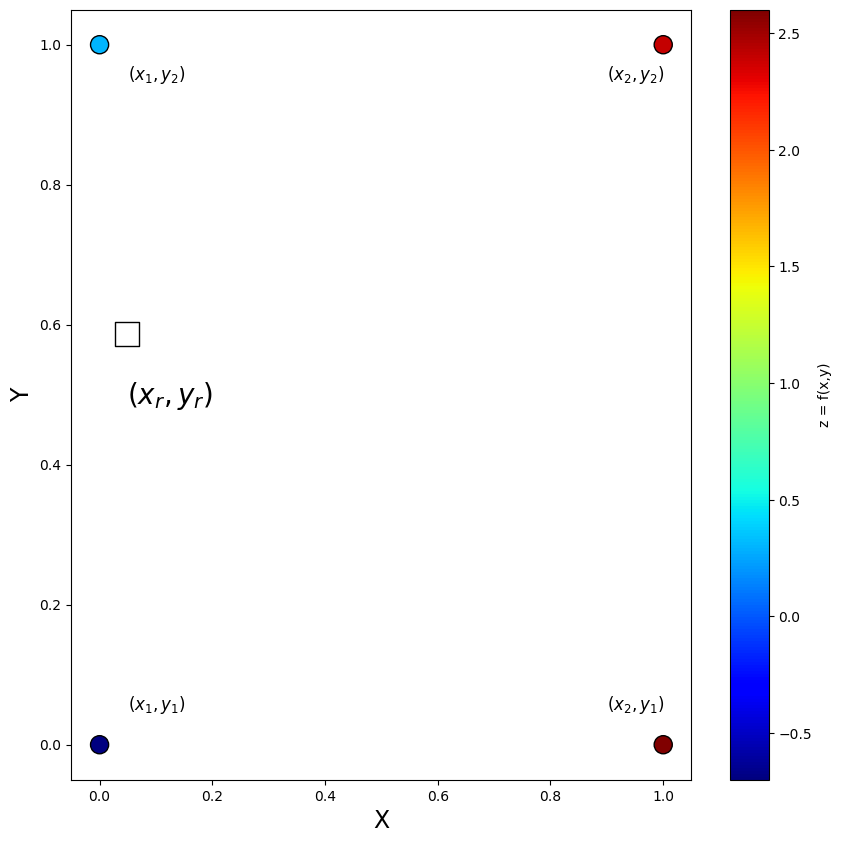

In [9]:
#Known data points and function values.  Listed clockwise from the x_1,y_1 = (0,0) point.
xi = np.array([0,0,1,1])  #x_1,x_1,x_2,x_2
yi = np.array([0,1,1,0])  #y_1,y_2,y_2,y_1
zi = np.array([-0.7,0.3,2.4,2.6])  

#Randomly generate coordinates to find function value (z = f(x,y)) at 
xr = np.random.uniform()
yr = np.random.uniform()

#Visualize
plt.figure(figsize=(10,10))
plt.scatter(xi,yi,c=zi,s=170,marker='o',cmap='jet',edgecolor='black')
plt.colorbar(label='z = f(x,y)')
plt.xlabel('X',fontsize=17)
plt.ylabel('Y',fontsize=17)
plt.scatter(xr,yr,edgecolor='black',marker='s',s=290,c='white')
plt.text(0.05,0.05,'($x_1,y_1)$',fontsize=12)
plt.text(0.05,0.95,'($x_1,y_2)$',fontsize=12)
plt.text(0.9,0.95,'($x_2,y_2)$',fontsize=12)
plt.text(0.9,0.05,'($x_2,y_1)$',fontsize=12)
plt.text(xr,yr-0.1,'($x_r,y_r)$',fontsize=20)



